# PROJECT DETAILS

Project Steps Overview The tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

---

# INTRODUCTION

The dataset i will be dealing with is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

The WeRateDog is a Twitter archive containing over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis.

# THE GOAL

The goal of this project is to wrangle the data, gather, assess, clean and tidy the dataset in other to provide meaningful and intelligent analyses and visualizations.

---

## INSTALL NECCESSARY LIBRARIES

In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


## IMPORT ALL NECCESSART LIBRARIES

In [6]:
import pandas as pd
from pandas import read_html
import html5lib
import numpy as np
import requests 
import tweepy
import datetime
import re
import os
import json
import time
import warnings

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns

print("Done")

Done


---

# STEP 1: Gathering Data

1. Twitter archive file
2. Tweet image predictions
3. Twitter API & JSON

## 1. Twitter Archive

This data was downloaded manually from the udacity server

### Load data into DataFrame as dftwitter

In [7]:
# Load the twitter archieve file into a DataFrame
dftwitter = pd.read_csv('twitter-archive-enhanced.csv')

In [8]:
dftwitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
dftwitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


## 2. Image Prediction

This file is hosted on Udacity servers and is downloaded programmatical using the request library and the URL below: "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [10]:
# Downloading URL programatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

HTTP status code 200 indicates the request has succeeded

In [11]:
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [12]:
#Read TSV file
dfimage = pd.read_csv('image-predictions.tsv', sep='\t' )

In [13]:
ls * tsv

 Volume in drive C has no label.
 Volume Serial Number is D085-624E

 Directory of C:\Users\derae\Data Analysis\Project2_3


 Directory of C:\Users\derae\Data Analysis\Project2_3

09/27/2022  09:11 AM    <DIR>          .
09/27/2022  09:11 AM    <DIR>          ..
09/27/2022  09:11 AM    <DIR>          .ipynb_checkpoints
09/27/2022  08:44 AM            41,981 act_report.ipynb
09/27/2022  10:37 AM           335,079 image-predictions.tsv
09/19/2022  10:29 AM        10,609,234 tweet-json.txt
09/25/2022  11:51 AM           945,530 twitter_archieve_master_new.csv
09/17/2022  09:03 AM           915,692 twitter-archive-enhanced.csv
09/27/2022  08:38 AM           563,990 wrangle_act.ipynb
09/25/2022  02:20 PM            20,905 wrangle_report.ipynb
               7 File(s)     13,432,411 bytes
               3 Dir(s)  414,274,711,552 bytes free


In [14]:
dfimage.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
dfimage.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


## 3. Twitter API & JSON

This data was gotten from twitter by querying the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive.

## Twitter API keys, Secrets, and Tokens

In [16]:
CONSUMER_KEY = 'HIDDEN'
CONSUMER_SECRET = 'HIDDEN'
OAUTH_TOKEN = 'HIDDEN'
OAUTH_TOKEN_SECRET = 'HIDDEN'

In [17]:
# Create the Twitter API object and set rate limit params

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth)

I encounterd some challenges while carrying out this process so i had to use from the reasource already provided in Udacity server from the URL below: 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'

In [18]:
# Downloading URL Programaticall
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
response

<Response [200]>

HTTP status code 200 indicates the request has succeeded

In [19]:
# Save HTML to file

json_list =[]
with open("tweet-json.txt",'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        favorite_count = tweets['favorite_count']
        retweet_count = tweets['retweet_count']
        
        json_list.append({'tweet_id':tweet_id,
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                         })

In [20]:
dfjtweet = pd.DataFrame(json_list, columns = ['tweet_id','favorite_count','retweet_count'])

In [21]:
dfjtweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [22]:
dfjtweet.tail()

,tweet_id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


---

# STEP 2: Assessing Data

In this section, i assembled all three dataset that i have previously gathered earlier
To assess them bothe visually and programmatically

Here i am going to be inspecting the dataset for two things:

- Data quality issues (i.e. content issues)
- Lack of tidiness (i.e. Structural issues)

## VISUAL INSPECTION

In [23]:
dftwitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [24]:
dfimage

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [25]:
dfjtweet

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


I also had to view the file from a text editor for proper visualization

---

## PROGRAMMATIC INSPECTION

In [26]:
dftwitter.shape

(2356, 17)

In [27]:
dftwitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [28]:
dftwitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [29]:
dftwitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [30]:
dftwitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [31]:
# Check for duplicacy
dftwitter.duplicated().sum()

0

This shows that we have no duplicated data

In [32]:
# View the sorces of data and their value count
dftwitter['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [33]:
dftwitter[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


- The max values are huge: 1776,170
- The minimum is 0 for both

In [34]:
dftwitter.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [35]:
sum(dftwitter.rating_denominator != 10)

23

## NOTE:

Many large numbers are multiples of 10 (2333)

When looking at some of those tweets we see that there is more than 1 dog in the photo.

Ignoring the retweets and replies we have the following list below

In [36]:
# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
den_find = (dftwitter.rating_denominator != 10) & \
            dftwitter.in_reply_to_status_id.isna() & \
            dftwitter.retweeted_status_id.isna()

den_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
dftwitter[den_find][den_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


In [37]:
sum(den_find)

17

## NOTE:

Ignoring the replies and retweets, there are 17 tweets with denominators that aren't 10

In [38]:
# Rating numerator vlaues
dftwitter.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [39]:
sum(dftwitter.rating_numerator >= 15)

28

## NOTES:

The output above shows ALL the rating_numerator values, showing a count of 28 tweets with numerator >= 15. Next, looking at ONLY those ratings with denominators = 10, the results are as follows:

In [40]:
df_tweets_den_10 = dftwitter[dftwitter.rating_denominator == 10]
df_tweets_den_10.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [41]:
sum(df_tweets_den_10.rating_numerator >= 15)

12

## NOTES:

Looking ONLY at tweets that have denominators = 10, there are 12 with numerators >= 15. Picking 15 as the lower boundary because it's got just 2 counts, while 14 has a count of 54.

In [42]:
# display tweets with numerator >= 15 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
den_find = (dftwitter.rating_denominator == 10) & \
            (dftwitter.rating_numerator >= 15) & \
            dftwitter.in_reply_to_status_id.isna() & \
            dftwitter.retweeted_status_id.isna()

den_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
dftwitter[den_find][den_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,27,10
979,This is Atticus. He's quite simply America af....,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of ...,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood...,670842764863651840,420,10


In [43]:
# display tweets with numerator = 0 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
den_find = (dftwitter.rating_denominator == 10) & \
            (dftwitter.rating_numerator == 0) & \
            dftwitter.in_reply_to_status_id.isna() & \
            dftwitter.retweeted_status_id.isna()

den_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
dftwitter[den_find][den_cols]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plag...,835152434251116546,0,10


In [44]:
# Check for retweets
len(dftwitter[dftwitter.retweeted_status_id.isnull() == False])

181

---

# Image Predictions

In [45]:
dfimage

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [46]:
dfimage.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [47]:
dfimage.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [48]:
dfimage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [49]:
dfimage.shape

(2075, 12)

In [50]:
sum(dfimage.duplicated())

0

In [51]:
sum(dfimage.jpg_url.duplicated()==True)

66

In [52]:
dfimage['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [53]:
dfimage.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


---

## JSON FILE

In [54]:
dfjtweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [55]:
dfjtweet.tail()

,tweet_id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [56]:
dfjtweet.shape

(2354, 3)

In [57]:
dfjtweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [58]:
dfjtweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [59]:
sum(dfjtweet.duplicated()==True)

0

---

## OBSERVATIONS

### QUALITY

- Twitter Archieve

1. Retweeted columns are not needed

2. in_reply_to_status_id and the in_reply_to_user_id not needed

3. Timestamp column needs to be a datetime variable

4. There are only 4 types of values in the source column, and they can be simplified by using the display string portion just before the final "<\a>":

    - Twitter for iPhone
    - Vine - Make a Scene
    - Twitter Web Client
    - TweetDeck

5. Tweets with missing data in expanded_urls (links to the tweet).

6. The rating denominator needs to be fixed

7. the rating numerator needs to be fixed



- Image Prediction

8. There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".

- Tweet JSON File

9. Set the tweet _id to string with astype()

## TIDINESS 

1. The Key Points indicates that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

2. Reply tweets are also not “original tweets” either; this data is stored in the columns in_reply_to_status_id, in_reply_to_user_id.

3. There are 4 columns for dog stages (doggo, floofer, pupper, puppo). The 4 columns for one variable doesn't conform to the rules of "tidy data".

- Image Prediction

4. The dog breed prediction and associated confidence level can be combined with the archive table; these will provide additional data about the dog in the tweet based on the tweet's image.

- Tweet JSON

5. Renaming the column names. This will be of help when we wish to merge the data

6. Change tweet_id from number to string for all data set. This will help when we will be merging the data. For consistency

# STEP 3: Cleaning Data

## Lets Prepare a Working Copy of each Seperate Dataset

In [60]:
dftwittercopy = dftwitter.copy()
dfimagecopy = dfimage.copy()
dfjtweetcopy = dfjtweet.copy()
print("Done")

Done


## Twitter Archieve

In [61]:
dftwittercopy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

## Quality #1

### There are retweets present, and we're only intrested in "Original tweets"

## Quality #2

### There are reply tweets in our data set and we're only intrested in "Original tweets"

## Tidiness #1

### All columns related to retweets will be droped

## Tidiness #2

### All columns related to replies will be droped

## DEFINE

- Taking Only Necessary Columns

## CODE

In [62]:
dftwittercopy = dftwitter[['tweet_id', 'timestamp', 'source', 'text',
                           'expanded_urls', 'rating_numerator',
                           'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

## TEST

In [63]:
dftwittercopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


## Quality #3

## DEFINE

Convert timestamp to datetime data type

## CODE 

In [64]:
dftwittercopy['timestamp'] = pd.to_datetime(dftwittercopy.timestamp)
dftwittercopy['timestamp'] = dftwittercopy.timestamp.dt.floor('s')

C:\Users\derae\AppData\Local\Temp\ipykernel_1764\2368123947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwittercopy['timestamp'] = pd.to_datetime(dftwittercopy.timestamp)
C:\Users\derae\AppData\Local\Temp\ipykernel_1764\2368123947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwittercopy['timestamp'] = dftwittercopy.timestamp.dt.floor('s')


## TEST

In [65]:
dftwittercopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

## Quality #4

## DEFINE

Replace the source string with the display portion of itself. Extract the string between a hrEf=""> and <a.

## CODE

In [66]:
dftwittercopy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [67]:
dftwittercopy['source'] = dftwittercopy['source'].str.extract('^<a.+>(.+)</a>$')

C:\Users\derae\AppData\Local\Temp\ipykernel_1764\3281299431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwittercopy['source'] = dftwittercopy['source'].str.extract('^<a.+>(.+)</a>$')


## TEST

In [68]:
dftwittercopy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## QUALITY #5

## DEFINE

Drop tweets with missing data in the expanded_urls

## CODE

In [69]:
dftwittercopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [70]:
dftwittercopy = dftwittercopy[dftwittercopy.expanded_urls.notnull()]

## TEST

In [71]:
dftwittercopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                2297 non-null   object             
 8   doggo               2297 non-null   object             
 9   floofer             2297 non-null   object             
 10  pupper              2297 non-null   object             
 11  puppo               2297 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

## Quality Archieve #6

## DEFINE

Assign 10 to rating denominator rating values and drop the remaining

## CODE

In [72]:
dftwittercopy.rating_denominator = dftwittercopy['rating_denominator'] = 10

C:\Users\derae\AppData\Local\Temp\ipykernel_1764\3703148832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwittercopy.rating_denominator = dftwittercopy['rating_denominator'] = 10


## TEST

In [73]:
dftwittercopy.rating_denominator.unique()

array([10], dtype=int64)

## Quality #7

## DEFINE

Drop tweets that have rating_numerator >= 15.

In [74]:
# display numerators greater than 15
mask = dftwittercopy.rating_numerator >= 15
dftwittercopy[mask].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
204     1
165     1
144     1
143     1
121     1
99      1
88      1
84      1
80      1
75      2
60      1
50      1
45      1
44      1
27      1
26      1
24      1
15      1
Name: rating_numerator, dtype: int64

In [75]:
dftwittercopy = dftwittercopy[dftwittercopy.rating_numerator < 15]

## TEST

In [76]:
# display ALL numerators
dftwittercopy.rating_numerator.value_counts().sort_index(ascending = False)

14     50
13    339
12    547
11    455
10    455
9     156
8     102
7      53
6      32
5      35
4      16
3      19
2       9
1       6
0       2
Name: rating_numerator, dtype: int64

## Tidiness #3

## DEFINE

Merge the dog_stage to one 

## CODE

In [77]:
def dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
        
    if not stage:
        return "None"
    else:
        return ','.join(stage)

In [78]:
dftwittercopy['dog_stage'] = dftwittercopy.apply(lambda row: dog_stage(row), axis = 1)

In [79]:
#drop the columns
dftwittercopy.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1, inplace = True)

## TEST

In [80]:
dftwittercopy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [81]:
pd.value_counts(dftwittercopy['dog_stage'])

None             1903
pupper            242
doggo              80
puppo              28
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [82]:
dftwittercopy.drop(dftwittercopy[dftwittercopy['dog_stage'] == "doggo,puppo"].index, inplace = True)

In [83]:
dftwittercopy.drop(dftwittercopy[dftwittercopy['dog_stage'] == "doggo,floofer"].index, inplace = True)

In [84]:
dftwittercopy.drop(dftwittercopy[dftwittercopy['dog_stage'] == "doggo,pupper"].index, inplace = True)

In [85]:
pd.value_counts(dftwittercopy['dog_stage'])

None       1903
pupper      242
doggo        80
puppo        28
floofer       9
Name: dog_stage, dtype: int64

In [86]:
dftwittercopy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [87]:
dftwittercopy.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
dog_stage             0
dtype: int64

# Image Prediction

In [88]:
dfimagecopy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Quality #8

Create two new columns; breed and confidence: check each dog breed in order (p1_dog, p2_dog, p3_dog), and pick the breed with the highest confidence level to be copied into the breed column.
Copy the associated confidence level into the new confidence column.
For cases where all 3 prediction flags are False (NOT a valid dog breed), set breed as 'none' and confidence to 0.

In [89]:
# setup the conditions for selection
conditions = [(dfimagecopy['p1_dog'] == True),
              (dfimagecopy['p2_dog'] == True),
              (dfimagecopy['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [dfimagecopy['p1'], 
                 dfimagecopy['p2'],
                 dfimagecopy['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [dfimagecopy['p1_conf'], 
                      dfimagecopy['p2_conf'], 
                      dfimagecopy['p3_conf']]

# select the predicted breed based on the first successful condition
dfimagecopy['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
dfimagecopy['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

In [90]:
dfimagecopy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


## Tidiness #4

## DEFINE

Merge the new breed and confidence columns into the twitter archive table, using an 'inner' join so that we are left with only tweets with images.
Now we can fix the confidence column; round the values up to a whole number in percentage format.

## CODE

In [91]:
dfimagecopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   p1          2075 non-null   object 
 4   p1_conf     2075 non-null   float64
 5   p1_dog      2075 non-null   bool   
 6   p2          2075 non-null   object 
 7   p2_conf     2075 non-null   float64
 8   p2_dog      2075 non-null   bool   
 9   p3          2075 non-null   object 
 10  p3_conf     2075 non-null   float64
 11  p3_dog      2075 non-null   bool   
 12  breed       2075 non-null   object 
 13  confidence  2075 non-null   float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


In [92]:
# merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
dftwittercopy = pd.merge(dftwittercopy, dfimagecopy[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
dftwittercopy.confidence = (dftwittercopy.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
dfimagecopy.drop(['breed', 'confidence'], axis = 1, inplace = True)

## TEST

In [93]:
dftwittercopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2041
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2042 non-null   int64              
 1   timestamp           2042 non-null   datetime64[ns, UTC]
 2   source              2042 non-null   object             
 3   text                2042 non-null   object             
 4   expanded_urls       2042 non-null   object             
 5   rating_numerator    2042 non-null   int64              
 6   rating_denominator  2042 non-null   int64              
 7   name                2042 non-null   object             
 8   dog_stage           2042 non-null   object             
 9   breed               2042 non-null   object             
 10  confidence          2042 non-null   int32              
dtypes: datetime64[ns, UTC](1), int32(1), int64(3), object(6)
memory usage: 183.5+ KB


In [94]:
dfimagecopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Quality #9

## DEFINE

set the tweet _id to string with astype()

## CODE

In [95]:
dfjtweetcopy['tweet_id'] = dfjtweetcopy['tweet_id'].astype('str')

## TEST

In [96]:
dfjtweetcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Tidiness #5

## DEFINE

Renaming the column names. This will be of help when we wish to merge the data

## CODE

In [97]:
dfjtweetcopy.rename(columns = {'favorite_count': 'likes', 'retweet_count': 'retweets'}, inplace = True)

## TEST

In [98]:
dfjtweetcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2354 non-null   object
 1   likes     2354 non-null   int64 
 2   retweets  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Tidiness #6

## DEFINE

Change tweet_id from number to string for all data set. This will help when we will be merging the data. For consistency

## CODE

In [99]:
# Change format type from number to string for all

dftwittercopy['tweet_id'] = dftwittercopy['tweet_id'].astype('str')
dfimagecopy['tweet_id'] = dfimagecopy['tweet_id'].astype('str')
dfjtweetcopy['tweet_id'] = dfjtweetcopy['tweet_id'].astype('str')
                                  

## TEST

In [100]:
type(dftwittercopy['tweet_id'].iloc[0])
type(dfimagecopy['tweet_id'].iloc[0])
type(dfjtweetcopy['tweet_id'].iloc[0])

str

---

# STEP 4: Storing and Merging Data

### Merging the data

In [101]:
dfmerge = pd.merge(dftwittercopy, dfimagecopy, on = ['tweet_id'], how = 'inner')
dfmerge = pd.merge(dfmerge, dfjtweetcopy, on = 'tweet_id', how = 'inner')

We have just combined all the data set into one frame

In [102]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 2039
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2040 non-null   object             
 1   timestamp           2040 non-null   datetime64[ns, UTC]
 2   source              2040 non-null   object             
 3   text                2040 non-null   object             
 4   expanded_urls       2040 non-null   object             
 5   rating_numerator    2040 non-null   int64              
 6   rating_denominator  2040 non-null   int64              
 7   name                2040 non-null   object             
 8   dog_stage           2040 non-null   object             
 9   breed               2040 non-null   object             
 10  confidence          2040 non-null   int32              
 11  jpg_url             2040 non-null   object             
 12  img_num             2040 non-null 

In [103]:
dfmerge.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,breed,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,none,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Chihuahua,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Chihuahua,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Labrador_retriever,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,basset,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [104]:
dfmerge.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,breed,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets
2035,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,miniature_pinscher,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111,41
2036,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,Rhodesian_ridgeback,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,311,147
2037,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,German_shepherd,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,128,47
2038,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,redbone,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,132,48
2039,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,Welsh_springer_spaniel,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2535,532


---

## Storing Data

In [105]:
dfmerge.to_csv('twitter_archieve_master.csv', encoding = 'utf-8', index = False)

In [106]:
ls * csv

 Volume in drive C has no label.
 Volume Serial Number is D085-624E

 Directory of C:\Users\derae\Data Analysis\Project2_3


 Directory of C:\Users\derae\Data Analysis\Project2_3

09/27/2022  10:38 AM    <DIR>          .
09/27/2022  10:38 AM    <DIR>          ..
09/27/2022  09:11 AM    <DIR>          .ipynb_checkpoints
09/27/2022  08:44 AM            41,981 act_report.ipynb
09/27/2022  10:37 AM           335,079 image-predictions.tsv
09/19/2022  10:29 AM        10,609,234 tweet-json.txt
09/27/2022  10:38 AM           945,530 twitter_archieve_master.csv
09/25/2022  11:51 AM           945,530 twitter_archieve_master_new.csv
09/17/2022  09:03 AM           915,692 twitter-archive-enhanced.csv
09/27/2022  10:38 AM           564,138 wrangle_act.ipynb
09/25/2022  02:20 PM            20,905 wrangle_report.ipynb
               8 File(s)     14,378,089 bytes
               3 Dir(s)  414,273,060,864 bytes free


In [107]:
dfwrangled = pd.read_csv('twitter_archieve_master.csv')

In [108]:
dfwrangled.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,breed,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,none,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Chihuahua,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Chihuahua,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Labrador_retriever,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,basset,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [109]:
dfwrangled.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,breed,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets
2035,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,miniature_pinscher,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111,41
2036,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,Rhodesian_ridgeback,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,311,147
2037,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,German_shepherd,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,128,47
2038,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,redbone,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,132,48
2039,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,Welsh_springer_spaniel,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2535,532


---

# STEP 5: ANALYSIS AND VISUALIZATION

The following analyses, tables and plots, are created with the cleaned data from the previous section. The variables that are used primarily have all undergone cleaning to varying degrees.

In [110]:
dfwrangled.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'breed',
       'confidence', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'likes', 'retweets'],
      dtype='object')

## Simple Statistics

First some simple questions to ask

In [111]:
dfwrangled[['rating_numerator', 'confidence', 'likes', 'retweets']].describe()

,rating_numerator,confidence,likes,retweets
count,2040.000000,2040.000000,2040.000000,2040.000000
mean,10.583333,45.732353,8558.168627,2967.430882
std,2.189394,33.751899,12120.591634,5057.858144
min,0.000000,0.000000,0.000000,16.000000
25%,10.000000,13.000000,1652.750000,628.750000
50%,11.000000,45.000000,3848.500000,1394.500000
75%,12.000000,76.000000,10975.500000,3443.250000
max,14.000000,99.000000,132810.000000,79515.000000


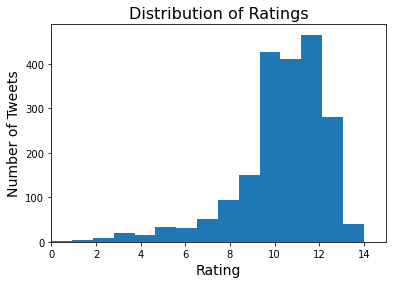

In [112]:
dfwrangled['rating_numerator'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.rcParams['figure.figsize'] = (8, 5)
plt.show();

The distribution of ratings is very skewed to the left. From the descriptive statistics above we see that 75% of all ratings are between 10 and 14 inclusive (the IQR is from 10 to 12).

- Percentage of tweets with rating of 10 and up

In [113]:
# Percentage of tweets with rating of 10 and up
rating_10up_total = sum(dfwrangled.rating_numerator >= 10)
rating_10up_perc = round(rating_10up_total * 100 / dfwrangled.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10up_total))
print("Percentage of tweets:                {}%".format(round(rating_10up_perc, 3)))

Number of tweets with rating 10+:  1626
Percentage of tweets:                80%


## What is the most liked tweet till date (top 5)

In [114]:
dfwrangled.sort_values(by = 'likes', ascending = False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,breed,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets
326,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,Lakeland_terrier,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,132810,48265
833,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,Labrador_retriever,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,131075,79515
59,879415818425184262,2017-06-26 19:07:24+00:00,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,English_springer,...,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True,107956,45849
425,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,Chihuahua,...,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,107015,56625
112,866450705531457537,2017-05-22 00:28:40+00:00,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,French_bulldog,...,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True,106827,32883


## What is the most retweeted tweet till date(Top 5)

In [115]:
dfwrangled.sort_values(by = 'retweets', ascending = False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,breed,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets
833,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,Labrador_retriever,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,131075,79515
207,842892208864923648,2017-03-18 00:15:37+00:00,Twitter for iPhone,RT @dog_rates: This is Stephan. He just wants ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,Chihuahua,...,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,0,56625
425,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,Chihuahua,...,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,107015,56625
867,739238157791694849,2016-06-04 23:31:25+00:00,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,Eskimo_dog,...,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True,75163,52360
326,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,Lakeland_terrier,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,132810,48265


## What is the most common stage

In [116]:
dfwrangled.dog_stage.value_counts()

None       1734
pupper      209
doggo        67
puppo        23
floofer       7
Name: dog_stage, dtype: int64

## What are the 10 most common breeds of dogs tweets about? (Excluding the None Categories)

In [117]:
str = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(dfwrangled.breed == 'none')
none_perc = none_count * 100 / dfwrangled.shape[0]
print(str.format(none_count, round(none_perc)))

str = "Number of distinct breeds:  {}"
print(str.format(len(dfwrangled.breed.unique())))

Number of tweets with 'none' predicted breed:  318 (16%)
Number of distinct breeds:  113


In [118]:
top10_breeds_count = \
dfwrangled[dfwrangled.breed != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print("--------------------------")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / dfwrangled.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
--------------------------
--------------------------
golden_retriever      164
Labrador_retriever    109
Chihuahua              95
Pembroke               95
pug                    65
toy_poodle             52
chow                   50
Samoyed                46
Pomeranian             41
cocker_spaniel         34
Name: breed, dtype: int64

Top 10 dog breeds make up 37% of all tweets


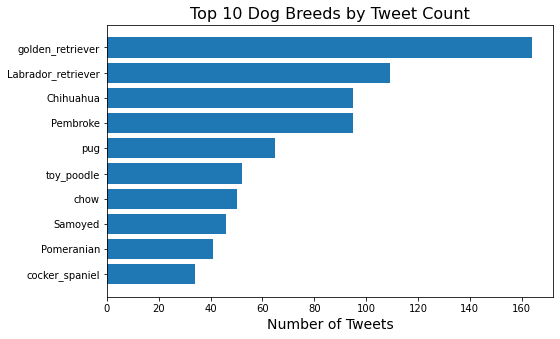

In [119]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

This shows that the most common dog that is tweeted about, with almost 160 tweets, is the Golden Retriever. Labrador Retrievers, Pembrokes and Chihuahuas are fairly close together in 2nd, 3rd, and 4th place.

In [120]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [121]:
#Remove links and apply to text
def remove_link(x):
    http_pos =x.find("http")
    if http_pos == -1:
        x = x
    else:
        x = x[:http_pos - 1]
    return x

In [122]:
dfwrangled.text = dfwrangled.text.apply(remove_link)

In [123]:
for row in dfwrangled.text[:5]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


In [124]:
dfwrangled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2040 non-null   int64  
 1   timestamp           2040 non-null   object 
 2   source              2040 non-null   object 
 3   text                2040 non-null   object 
 4   expanded_urls       2040 non-null   object 
 5   rating_numerator    2040 non-null   int64  
 6   rating_denominator  2040 non-null   int64  
 7   name                2040 non-null   object 
 8   dog_stage           2040 non-null   object 
 9   breed               2040 non-null   object 
 10  confidence          2040 non-null   int64  
 11  jpg_url             2040 non-null   object 
 12  img_num             2040 non-null   int64  
 13  p1                  2040 non-null   object 
 14  p1_conf             2040 non-null   float64
 15  p1_dog              2040 non-null   bool   
 16  p2    

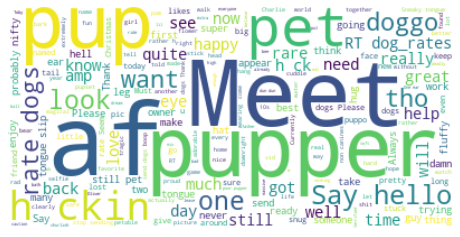

In [125]:
# Word Cloud of text 
#Collect all texts from column 'text'
text1 = " ".join(review for review in dfwrangled.text)

#Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["puppy", "Bruno", "dog", "good", "boy", "cool"])

#Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text1)

# Display the generated image:
# the matplotlib way
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Retweets and Favorites Plot')

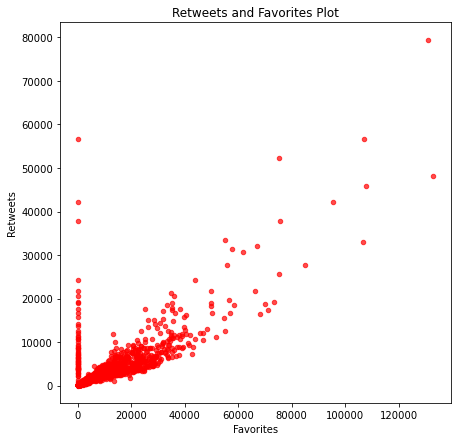

In [126]:
dfwrangled.plot(kind = "scatter", x = "likes", y = "retweets", alpha = 0.7, figsize = (7,7), color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and Favorites Plot')

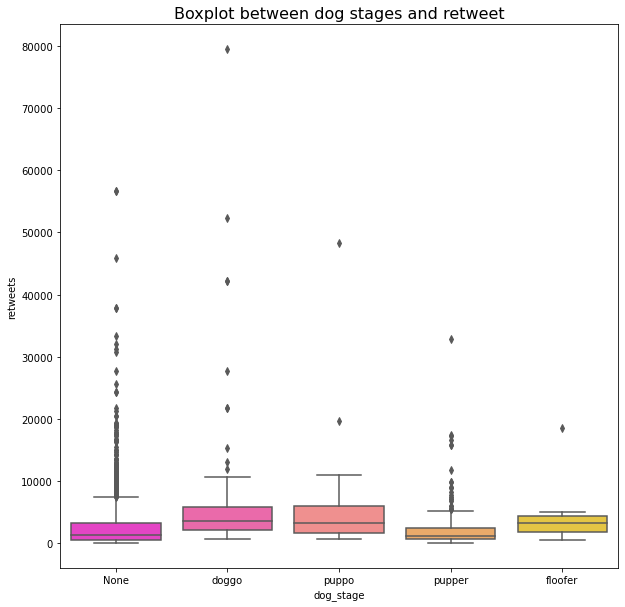

In [127]:
plt.figure(figsize = (10, 10))
g = sns.boxplot(x = 'dog_stage', y ='retweets', data = dfwrangled, palette = 'spring')
g.axes.set_title('Boxplot between dog stages and retweet', fontsize = 16);